# Clasificación básica de texto

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

## Carga del dataset

In [3]:
digits = datasets.load_digits()

In [4]:
#
# Clases
#
set(digits.target)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

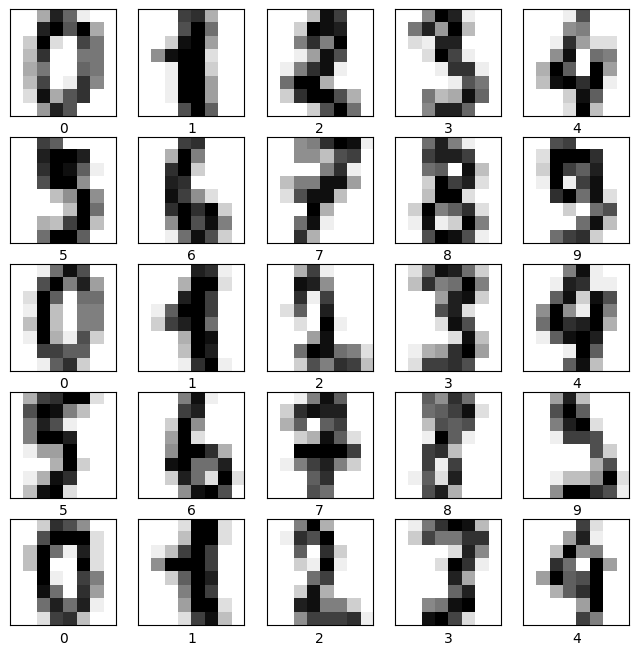

In [5]:
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(digits.target[i])
plt.show()


## Preparación de datos

In [6]:
#
# Cambio de las dimensiones de los datos
#
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape

(1797, 64)

In [7]:
#
# Particionamiento de los datos
#
X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False,
) # Verificación cruzada: Tener una muestra por fuera del entrenamiento para luego hacer verificación.

## Construcción del modelo

In [8]:
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)

## Entrenameinto del modelo

In [9]:
estimator.fit(
    X_train, # Dato
    y_train, # Resultado esperado
)

LogisticRegression(max_iter=1000)

## Evaluación del modelo (accuracy)

In [10]:
from sklearn.metrics import accuracy_score

#
# Muestra de entrenamiento
#
accuracy_score(y_true=y_train, y_pred=estimator.predict(X_train))

1.0

In [11]:
#
# Muestra de prueba
#
predictions = estimator.predict(X_test)
predicted_proba = estimator.predict_proba(X_test)

accuracy_score(y_true=y_test, y_pred=predictions)

0.92880978865406

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Compara la presición de los datos clase a clase

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")